# $\Delta\phi_{min}$ vs. $\langle n \rangle$ plots using parity operator

In [2]:
%matplotlib inline

from math import *
from qutip import *
from pylab import *

from scipy.optimize import minimize as cp_minimize

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Symbols & operators

In [3]:
N = 10 # dimension of the Hilbert space
I = qeye(N) # identity operator
n = num(N); n_a = tensor(n, I); n_b = tensor(I, n) # number operators
S_n = n_a + n_b # ΣN = n_1 + n_2
a = destroy(N) # annihilation operator

### Functions for input states

In [4]:
# returns ρ_in given pure state ψ_in
def rho(psi):
    return psi*psi.dag()

# |ψ_in_4> = N(a_1†|α_1,α_2>+a_2†|α_1,α_2>)
def psi_in_4(alpha_1, alpha_2):
    psi_alphas = tensor(coherent(N, alpha_1),coherent(N, alpha_2)) # |α_1,α_2>
    temp = tensor(a.dag(), I)*psi_alphas + tensor(I, a.dag())*psi_alphas
    return temp.unit()

### Helper functions

In [5]:
def make_plot(n_avgs, phi_std_dev_mins, phi_l_std_dev_mins, plot_name):
    plt.plot(n_avgs, phi_std_dev_mins, 'bo-', label=r'$\Delta\phi_{min}$')
    plt.plot(n_avgs, phi_l_std_dev_mins, 'ro-', label=r'$\Delta\phi_{min,loss}$')
    plt.plot(n_avgs, 1/np.sqrt(n_avgs), 'yo-', label=r'$1/\sqrt{\langle n \rangle}$')
    plt.plot(n_avgs, 1/np.array(n_avgs), 'g.-', label=r'$1/\langle n \rangle$')

    plt.yscale('log')
    plt.xlabel(r'$\langle n \rangle$')
    plt.legend(loc='best')
    
    plt.savefig(plot_name)

In [6]:
n_4_avgs = []; phi_4_std_dev_mins = [];

file = open("parity_numerical_Heisenberg_2_345.txt", "r")

for line in file:
    if not line.startswith('#'):
        data = line.split()
        alpha_1 = float(data[0])
        alpha_2 = float(data[1])
        rho_in_4 = rho(psi_in_4(alpha_1,alpha_2))
        n_4_avgs.append(np.abs((rho_in_4*S_n).tr()))
        
        phi_4_std_dev_mins.append(float(data[3]))

In [8]:
phi_4_l_std_dev_mins = []

file_l = open("parity_numerical_Heisenberg_2_loss_4_5%.txt", "r")

for line in file_l:
    if not line.startswith('#'):
        data = line.split()
        phi_4_l_std_dev_mins.append(float(data[2]))

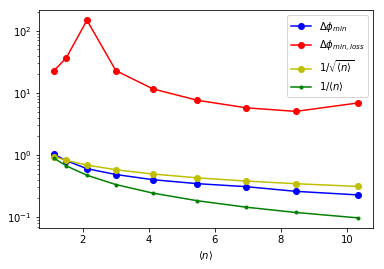

In [9]:
make_plot(n_4_avgs, phi_4_std_dev_mins, phi_4_l_std_dev_mins, "parity_numerical_Heisenberg_2/loss_4.png")